In [1]:
from CoLoRe_corrf_analysis.plot_methods import Plots
from CoLoRe_corrf_analysis.file_funcs import FileFuncs
from CoLoRe_corrf_analysis.fitter import Fitter
from CoLoRe_corrf_analysis.cf_helper import CFComputations
from CoLoRe_corrf_analysis.read_colore import ComputeModelsCoLoRe

from scipy.interpolate import interp1d
from scipy import ndimage

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
_ = Path('.').resolve()
os.chdir('/global/homes/c/cramirez/Work/QSO_clustering_analysis/modules')
from data_readers import AbacusOut, eBossOut
os.chdir(_)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
corrf_files = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_from_cat_multibias/')
colore_boxes = corrf_files.parent / 'CoLoRe_boxes'

In [6]:
theory_path = colore_boxes / 'high_3x2_600'
assert theory_path.is_dir()

theory = ComputeModelsCoLoRe(
    box_path=theory_path,
    source=1,
    bias_filename=Path('/global/project/projectdirs/desi/users/cramirez/QSO_clustering_analysis/input_files/Bz_qso_G18.txt'),
    apply_lognormal=True)

theory_2lpt = ComputeModelsCoLoRe(
    box_path=theory_path,
    bias_filename=Path('/global/project/projectdirs/desi/users/cramirez/QSO_clustering_analysis/input_files/Bz_qso_G18.txt'),
    source=1,
    apply_lognormal=False)

In [7]:
zmin = 0.8
zmax = 2.1 
rsd = True

In [8]:
def get_boxes(path, rsd=rsd, rmin=0.1, rmax=200, N_bins=41, zmin=zmin, zmax=zmax, nside=2):
    return FileFuncs.mix_sims(
        FileFuncs.get_full_path(path,
                                rsd=rsd, rsd2=None, 
                                rmin=rmin, rmax=rmax, N_bins=N_bins,
                                zmin=zmin, zmax=zmax, nside=2)
    )

In [9]:
class NotebookHelper:
    def __str__(self):
        return self.label

analyses = []

_ = NotebookHelper()
_.path = corrf_files / '0' / 'high_3x2_600_bias3_multibias'
_.label = 'logn_3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
_.theory = theory_2lpt
_.color = 'navy'
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / '0' / 'high_3x2_600_2lpt_bias3_multibias'
_.label = '2lpt_3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
_.theory = theory_2lpt
_.color = 'red'
analyses.append(_)

class RealDataHelper:
    def smoothed_npole(self, pole, sigma=1):
        _r = self.boxes[0].savg
        npole = self.boxes[0].compute_npole(pole)
        _smoothed_r2_npole =  ndimage.gaussian_filter1d(_r**2*npole, sigma)
        return _smoothed_r2_npole/_r**2
    
    @property
    def r(self):
        return self.boxes[0].savg
    
    def compute_npole(self, pole):
        return self.boxes[0].compute_npole(pole)
    
    def __str__(self):
        return self.label
        
realdata = RealDataHelper()
realdata.path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_real_data/')
realdata.bias_model = None
realdata.dens_type = None
realdata.boxes = [CFComputations(Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_real_data/nside_0/rsd/0.1_200_41/0.8_2.1/0/0'))]
realdata.theory = theory_2lpt
realdata.color = 'k'
realdata.label = 'SV3'

abacus = NotebookHelper()
abacus.path = '/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/Clustering/CubicBox/QSO/AbacusSummit_base_c000/z1.400/2PCF'
abacus.bias_model = None
abacus.dens_type = None
abacus.boxes = [AbacusOut(i) for i in Path('/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/Clustering/CubicBox/QSO/AbacusSummit_base_c000/z1.400/2PCF').glob('*_RSD.dat')]
abacus.theory = theory_2lpt
abacus.color = 'silver'
abacus.label = 'abacus'

    
eboss = eBossOut('../eBOSS_data/Model_QSOxi_NGCSGC_0.8z2.2_prerecon.txt')
eboss.color = 'salmon'
eboss.label = 'eboss'

for analysis in analyses:
    assert analysis.path.is_dir()

In [10]:
pole_string = {0: 'Monopole', 2: 'Quadrupole'}

In [11]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
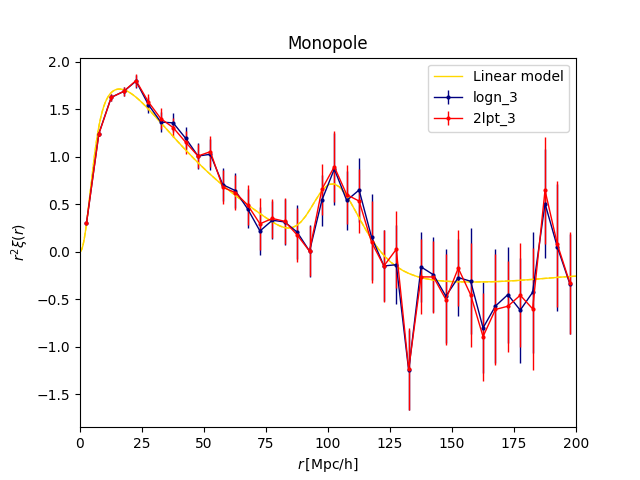

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
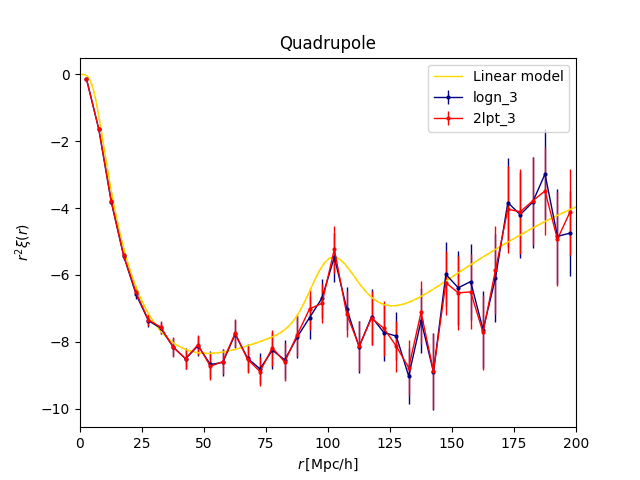

In [12]:
for pole in 0, 2:
    fig, ax = plt.subplots()

    for analysis in analyses:
        analysis.z = analysis.theory.get_zeff(zmin, zmax)
        Plots.plot_data(pole, analysis.boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1, c=analysis.color, label=str(analysis)))
    Plots.plot_theory(pole, z=analysis.z, theory=theory_2lpt, ax=ax, rsd=rsd, bias=0, plot_args=dict(label='Linear model', lw=1, ls='-', c='gold'))
    ax.set_title(pole_string[pole])
    ax.set_xlim(0, 200)
    ax.legend()

## noRSD

In [13]:
zmin = 0.8
zmax = 2.1 
rsd = False

In [14]:
def get_boxes(path, rsd=rsd, rmin=0.1, rmax=200, N_bins=41, zmin=zmin, zmax=zmax, nside=2):
    return FileFuncs.mix_sims(
        FileFuncs.get_full_path(path,
                                rsd=rsd, rsd2=None, 
                                rmin=rmin, rmax=rmax, N_bins=N_bins,
                                zmin=zmin, zmax=zmax, nside=2)
    )

In [15]:
class NotebookHelper:
    def __str__(self):
        return self.label

analyses = []

_ = NotebookHelper()
_.path = corrf_files / '0' / 'high_3x2_600_bias3_multibias'
_.label = 'logn_3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
_.theory = theory_2lpt
_.color = 'navy'
analyses.append(_)

_ = NotebookHelper()
_.path = corrf_files / '0' / 'high_3x2_600_2lpt_bias3_multibias'
_.label = '2lpt_3'
_.bias_model = 3
_.dens_type = 0
_.boxes = get_boxes(_.path)
_.theory = theory_2lpt
_.color = 'red'
analyses.append(_)

class RealDataHelper:
    def smoothed_npole(self, pole, sigma=1):
        _r = self.boxes[0].savg
        npole = self.boxes[0].compute_npole(pole)
        _smoothed_r2_npole =  ndimage.gaussian_filter1d(_r**2*npole, sigma)
        return _smoothed_r2_npole/_r**2
    
    @property
    def r(self):
        return self.boxes[0].savg
    
    def compute_npole(self, pole):
        return self.boxes[0].compute_npole(pole)
    
    def __str__(self):
        return self.label
        
realdata = RealDataHelper()
realdata.path = Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_real_data/')
realdata.bias_model = None
realdata.dens_type = None
realdata.boxes = [CFComputations(Path('/global/cscratch1/sd/cramirez/QSO_clustering_analysis/corrf_real_data/nside_0/rsd/0.1_200_41/0.8_2.1/0/0'))]
realdata.theory = theory_2lpt
realdata.color = 'k'
realdata.label = 'SV3'

abacus = NotebookHelper()
abacus.path = '/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/Clustering/CubicBox/QSO/AbacusSummit_base_c000/z1.400/2PCF'
abacus.bias_model = None
abacus.dens_type = None
abacus.boxes = [AbacusOut(i) for i in Path('/global/cfs/cdirs/desi/cosmosim/FirstGenMocks/AbacusSummit/Clustering/CubicBox/QSO/AbacusSummit_base_c000/z1.400/2PCF').glob('*_RSD.dat')]
abacus.theory = theory_2lpt
abacus.color = 'silver'
abacus.label = 'abacus'

    
eboss = eBossOut('../eBOSS_data/Model_QSOxi_NGCSGC_0.8z2.2_prerecon.txt')
eboss.color = 'salmon'
eboss.label = 'eboss'

for analysis in analyses:
    assert analysis.path.is_dir()

In [16]:
pole_string = {0: 'Monopole', 2: 'Quadrupole'}

In [17]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
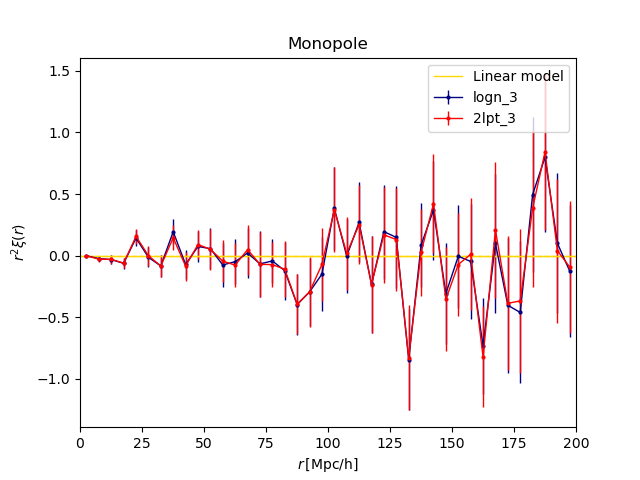

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
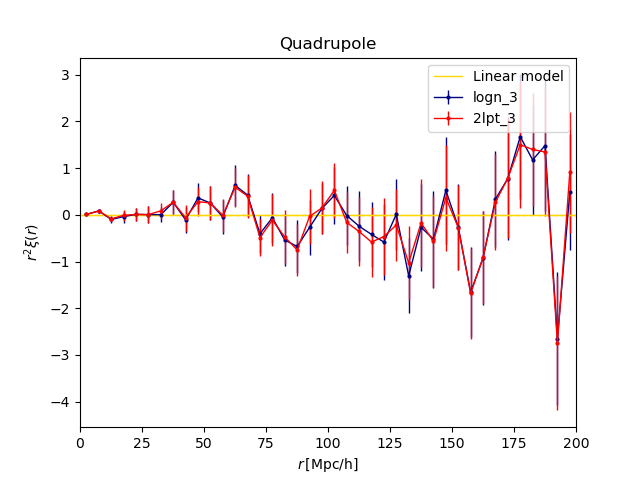

In [18]:
for pole in 0, 2:
    fig, ax = plt.subplots()

    for analysis in analyses:
        analysis.z = analysis.theory.get_zeff(zmin, zmax)
        Plots.plot_data(pole, analysis.boxes, ax=ax, plot_args=dict(fmt='-', marker='o', markersize=2, lw=1, c=analysis.color, label=str(analysis)))
    Plots.plot_theory(pole, z=analysis.z, theory=theory_2lpt, ax=ax, rsd=rsd, bias=0, plot_args=dict(label='Linear model', lw=1, ls='-', c='gold'))
    ax.set_title(pole_string[pole])
    ax.set_xlim(0, 200)
    ax.legend()
    plt.show()